In [43]:
import numpy as nd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score

#Model Selection and Validation
from sklearn.model_selection import train_test_split

In [15]:
train_tweets_csv = pd.read_csv('tweets.csv')
test_tweets_csv = pd.read_csv('test_tweets.csv')

In [24]:
train_tweets = train_tweets_csv[['tweet_text', 'sentiment']]
test_tweets = test_tweets_csv[['tweet_text']]


test_tweets.head()

,tweet_text
0,"['Hate', 'say', 'billmaher', 'right', 'GOP', '..."
1,"['IamNevadaGirl', 'Ninjahguru', 'Penny', 'Drea..."
2,"['Sad', 'start', 'uni', 'shit', 'already', 'ha..."
3,"['RT', 'RealBbPilipinas', 'Let', 'express', 'm..."
4,"['RT', 'dajjrambo', 'ever', 'put', 'Coat', 'so..."


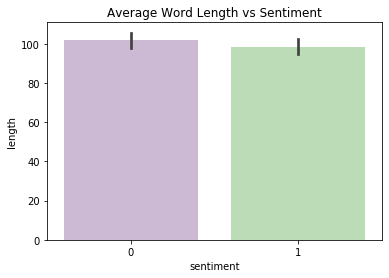

In [25]:
# positive = 0 
# negative = 0
# for val in train_tweets['sentiment']:
#     print(val)
#     if val == 0:
#         positive += 1
#     else: 
#         negative += 1

# print(positive, negative)

# # train_tweets['length'] = train_tweets['tweet_text'].apply(len)
# train_tweets.head()

# if ((train_tweets['sentiment']) != False):
#     length = length + 1
train_tweets['length'] = train_tweets['tweet_text'].apply(len)

fig1 = sns.barplot('sentiment','length', data = train_tweets, palette='PRGn')
plt.title('Average Word Length vs Sentiment')
plot = fig1.get_figure()
plot.savefig('Bargraph.png')


In [26]:
train_tweets.head()


,tweet_text,sentiment,length
0,"['RT', 'Saints', 'die', 'want', 'Saints', 'def...",1,100
1,"['manage', 'throw', 'dinner', 'feel', 'great']",0,46
2,"['RT', 'please', 'tell', 'much', 'u', 'wan', '...",1,74
3,"['RT', 'eeeeeebeeeeeee', 'Wan', 'na', 'dont', ...",0,75
4,"['RT', 'rjmxrell', 'hate', 'simple', 'thing', ...",1,60


In [27]:
X = train_tweets['tweet_text']
y = train_tweets['sentiment']

In [28]:
test = test_tweets['tweet_text']

# print(test_tweets['tweet_text'])

In [30]:
tw_train, tw_test, label_train, label_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [38]:
pipe = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('nbclassifier', MultinomialNB())
])

pipe.fit(tw_train, label_train)

Pipeline(memory=None,
     steps=[('vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...False, use_idf=True)), ('nbclassifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [46]:
predictions = pipe.predict(tw_test)

In [47]:
print(classification_report(predictions,label_test))
f1_score(label_test, predictions)


precision    recall  f1-score   support

           0       0.82      0.88      0.85       150
           1       0.89      0.84      0.87       178

   micro avg       0.86      0.86      0.86       328
   macro avg       0.86      0.86      0.86       328
weighted avg       0.86      0.86      0.86       328



0.8670520231213873